# Impor

In [90]:
import json
from urllib.request import Request, urlopen
import pandas as pd
import requests
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [91]:
req = Request('https://data.bmkg.go.id/DataMKG/TEWS/gempaterkini.json', headers={'User-Agent': 'Mozilla/5.0'})
response = urlopen(req).read()
data = json.loads(response.decode('utf-8'))
data = data['Infogempa']['gempa']
df = pd.DataFrame(data)
df

,Tanggal,Jam,DateTime,Coordinates,Lintang,Bujur,Magnitude,Kedalaman,Wilayah,Potensi
0,16 Des 2023,13:45:54 WIB,2023-12-16T06:45:54+00:00,"-0.35,98.75",0.35 LS,98.75 BT,5.4,19 km,130 km BaratDaya PASAMANBARAT-SUMBAR,Tidak berpotensi tsunami
1,15 Des 2023,00:49:05 WIB,2023-12-14T17:49:05+00:00,"-6.79,130.60",6.79 LS,130.60 BT,5.2,166 km,152 km BaratLaut TANIMBAR,Tidak berpotensi tsunami
2,14 Des 2023,08:05:52 WIB,2023-12-14T01:05:52+00:00,"-0.00,124.08",0.00 LS,124.08 BT,5.5,99 km,42 km Tenggara BOLAANGUKI-BOLSEL-SULUT,Tidak berpotensi tsunami
3,13 Des 2023,21:30:54 WIB,2023-12-13T14:30:54+00:00,"-7.61,128.79",7.61 LS,128.79 BT,5.1,199 km,126 km TimurLaut MALUKUBRTDAYA,Tidak berpotensi tsunami
4,12 Des 2023,07:37:27 WIB,2023-12-12T00:37:27+00:00,"-10.47,116.98",10.47 LS,116.98 BT,5.1,10 km,191 km Tenggara SUMBAWABARAT-NTB,Tidak berpotensi tsunami
5,11 Des 2023,17:16:40 WIB,2023-12-11T10:16:40+00:00,"-0.49,101.36",0.49 LS,101.36 BT,5.8,257 km,19 km BaratDaya KUANTANSINGINGI-RIAU,Tidak berpotensi tsunami
6,11 Des 2023,11:33:32 WIB,2023-12-11T04:33:32+00:00,"2.62,128.23",2.62 LU,128.23 BT,5.3,114 km,62 km TimurLaut PULAUDOI-MALUT,Tidak berpotensi tsunami
7,11 Des 2023,02:52:14 WIB,2023-12-10T19:52:14+00:00,"-4.39,139.67",4.39 LS,139.67 BT,5.5,72 km,19 km TimurLaut YAHUKIMO-PAPUAPGNGN,Tidak berpotensi tsunami
8,10 Des 2023,11:49:46 WIB,2023-12-10T04:49:46+00:00,"-3.55,141.05",3.55 LS,141.05 BT,5.3,105 km,39 km Tenggara KEEROM-PAPUA,Tidak berpotensi tsunami
9,07 Des 2023,20:09:44 WIB,2023-12-07T13:09:44+00:00,"5.74,125.50",5.74 LU,125.50 BT,5.6,12 km,206 km BaratLaut PULAUKARATUNG-SULUT,Tidak berpotensi tsunami


# Praproses Data

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tanggal      15 non-null     object
 1   Jam          15 non-null     object
 2   DateTime     15 non-null     object
 3   Coordinates  15 non-null     object
 4   Lintang      15 non-null     object
 5   Bujur        15 non-null     object
 6   Magnitude    15 non-null     object
 7   Kedalaman    15 non-null     object
 8   Wilayah      15 non-null     object
 9   Potensi      15 non-null     object
dtypes: object(10)
memory usage: 1.3+ KB


In [93]:
df.drop(columns=['Tanggal', 'Jam', 'Lintang', 'Bujur', 'Wilayah'], inplace=True)

In [94]:
# Format DateTime
df['DateTime'] = pd.to_datetime(df['DateTime'], utc=True)

In [95]:
# Format Coordinates
df[['Lintang', 'Bujur']] = df['Coordinates'].str.split(',', n=1, expand=True)
df = df.astype({"Lintang": float, "Bujur": float})
df.drop(columns=['Coordinates'], inplace=True)

In [96]:
# Format Magnitude
df = df.astype({"Magnitude": float})

In [97]:
# Format Kedalaman
df['Kedalaman'] = df['Kedalaman'].str.rstrip(' km')
df = df.astype({"Kedalaman": int})

In [98]:
# Format Potensi
df["Potensi"].replace({'Tidak berpotensi tsunami' : 0, 'Berpotensi tsunami' : 1}, inplace=True)
df.rename(columns={'Potensi': 'Potensi Tsunami'}, inplace=True)

In [99]:
df = df[['DateTime', 'Lintang', 'Bujur', 'Magnitude', 'Kedalaman', 'Potensi Tsunami']]

In [100]:
df

,DateTime,Lintang,Bujur,Magnitude,Kedalaman,Potensi Tsunami
0,2023-12-16 06:45:54+00:00,-0.35,98.75,5.4,19,0
1,2023-12-14 17:49:05+00:00,-6.79,130.60,5.2,166,0
2,2023-12-14 01:05:52+00:00,-0.00,124.08,5.5,99,0
3,2023-12-13 14:30:54+00:00,-7.61,128.79,5.1,199,0
4,2023-12-12 00:37:27+00:00,-10.47,116.98,5.1,10,0
5,2023-12-11 10:16:40+00:00,-0.49,101.36,5.8,257,0
6,2023-12-11 04:33:32+00:00,2.62,128.23,5.3,114,0
7,2023-12-10 19:52:14+00:00,-4.39,139.67,5.5,72,0
8,2023-12-10 04:49:46+00:00,-3.55,141.05,5.3,105,0
9,2023-12-07 13:09:44+00:00,5.74,125.50,5.6,12,0


# Diagnostik

## Pattern

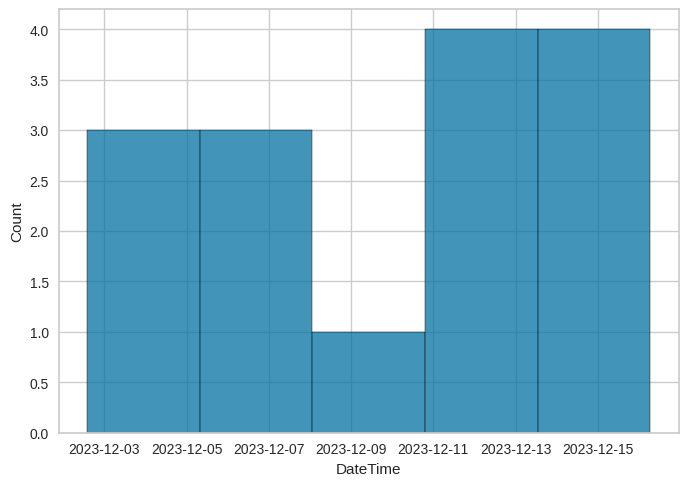

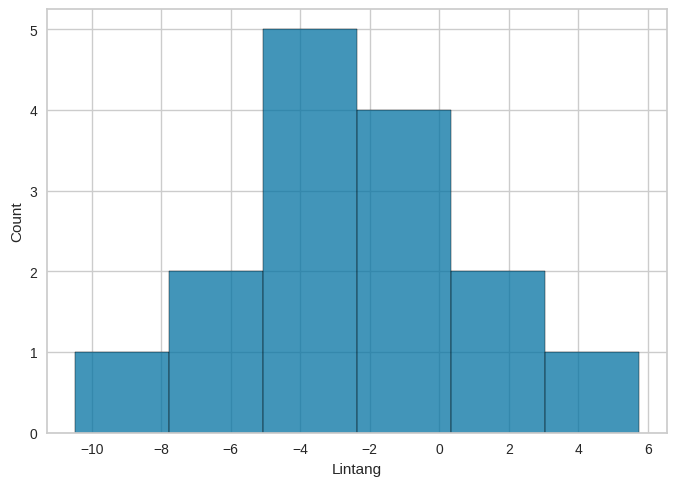

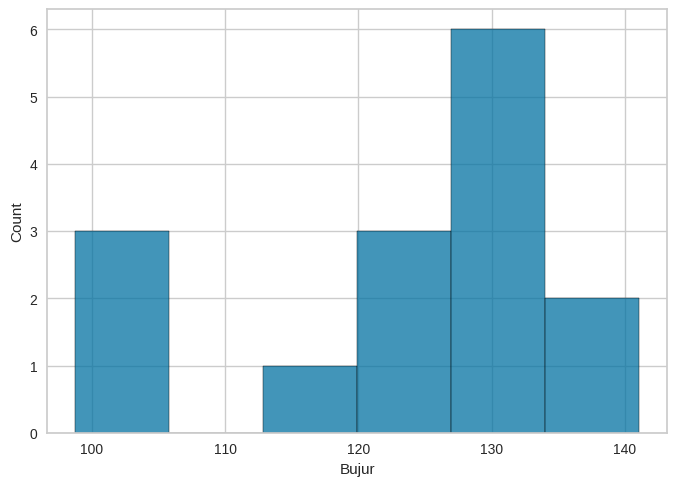

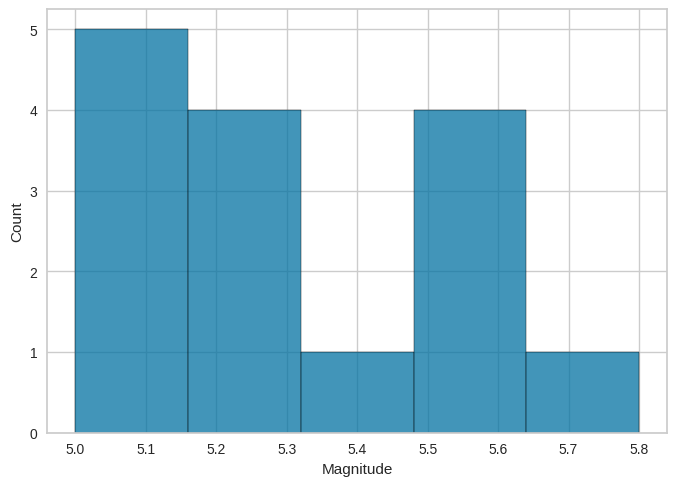

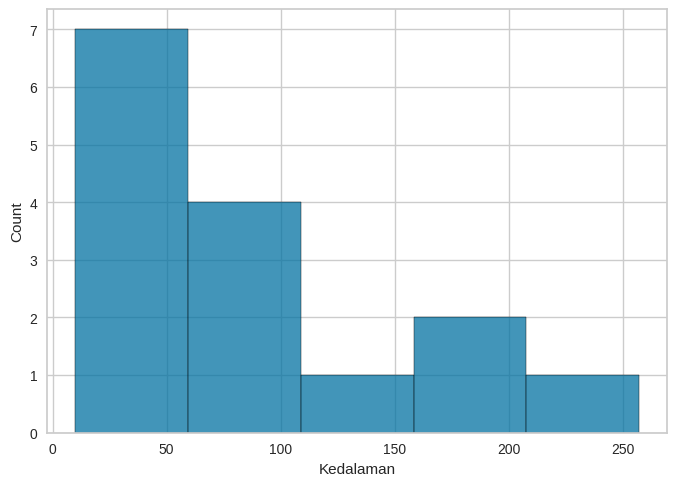

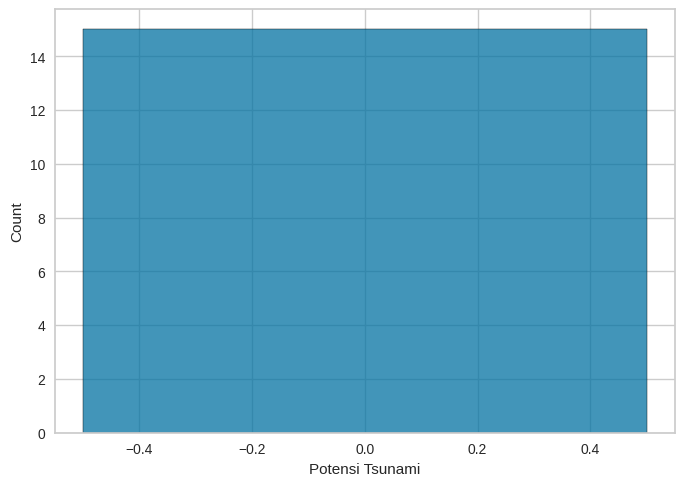

In [101]:
for i in df:
  plt.figure()
  sns.histplot(df[i])

## Deteksi Outlier

<Axes: >

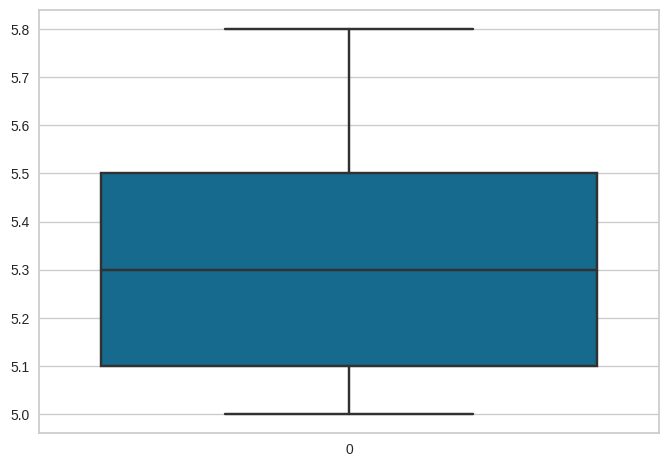

In [102]:
# Boxplot Magnitude
sns.boxplot(data=df['Magnitude'])

<Axes: >

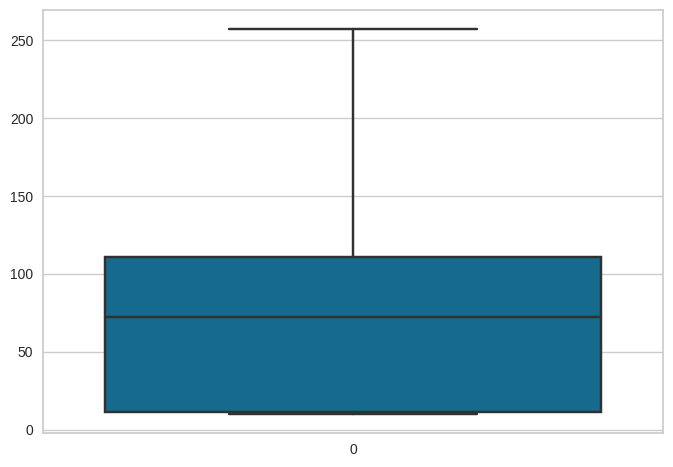

In [103]:
# Boxplot Kedalaman
sns.boxplot(data=df['Kedalaman'])

In [104]:
# Tukey’s Fences Magnitude
magQ = df['Magnitude'].quantile([0.25, 0.75])
magIQR = magQ[0.75] - magQ[0.25]
magLB = magQ[0.25] - (1.5 * magIQR)
magUB = magQ[0.75] + (1.5 * magIQR)


df["Magnitude Tukey's Fences Outlier"] = False

for i in range(len(df)):
    if df['Magnitude'][i] < magLB or df['Magnitude'][i] > magUB:
        df.at[i, "Magnitude Tukey's Fences Outlier"] = True

In [105]:
# Standard Deviation Magnitude
magMean = df['Magnitude'].mean()
magStd = df['Magnitude'].std()
magLB = magMean - (3 * magStd)
magUB = magMean + (3 * magStd)


df["Magnitude Standard Deviation Outlier"] = False

for i in range(len(df)):
    if df['Magnitude'][i] < magLB or df['Magnitude'][i] > magUB:
        df.at[i, "Magnitude Standard Devaition Outlier"] = True

In [106]:
# Standard Deviation Magnitude
df['Magnitude Z Score'] = (df['Magnitude'] - magMean) / magStd

df["Magnitude Z Score Outlier"] = False

for i in range(len(df)):
    if df['Magnitude Z Score'][i] < -3 or df['Magnitude Z Score'][i] > 3:
        df.at[i, "Magnitude Z Score Outlier"] = True

In [107]:
# Tukey’s Fences Kedalaman
kedQ = df['Kedalaman'].quantile([0.25, 0.75])
kedIQR = kedQ[0.75] - kedQ[0.25]
kedLB = kedQ[0.25] - (1.5 * kedIQR)
kedUB = kedQ[0.75] + (1.5 * kedIQR)


df["Kedalaman Tukey's Fences Outlier"] = False

for i in range(len(df)):
    if df['Kedalaman'][i] < kedLB or df['Kedalaman'][i] > kedUB:
        df.at[i, "Kedalaman Tukey's Fences Outlier"] = True

In [108]:
# Standarad Devation Kedalaman
kedMean = df['Kedalaman'].mean()
kedStd = df['Kedalaman'].std()
kedLB = kedMean - (3 * kedStd)
kedUB = kedMean + (3 * kedStd)


df["Kedalaman Standard Deviation Outlier"] = False

for i in range(len(df)):
    if df['Kedalaman'][i] < kedLB or df['Kedalaman'][i] > kedUB:
        df.at[i, "Kedalaman Standard Devaition Outlier"] = True

In [109]:
# Standard Deviation Kedalaman
df['Kedalaman Z Score'] = (df['Kedalaman'] - kedMean) / kedStd

df["Kedalaman Z Score Outlier"] = False

for i in range(len(df)):
    if df['Kedalaman Z Score'][i] < -3 or df['Kedalaman Z Score'][i] > 3:
        df.at[i, "Kedalaman Z Score Outlier"] = True

In [110]:
df

,DateTime,Lintang,Bujur,Magnitude,Kedalaman,Potensi Tsunami,Magnitude Tukey's Fences Outlier,Magnitude Standard Deviation Outlier,Magnitude Z Score,Magnitude Z Score Outlier,Kedalaman Tukey's Fences Outlier,Kedalaman Standard Deviation Outlier,Kedalaman Z Score,Kedalaman Z Score Outlier
0,2023-12-16 06:45:54+00:00,-0.35,98.75,5.4,19,0,False,False,0.370313,False,False,False,-0.778476,False
1,2023-12-14 17:49:05+00:00,-6.79,130.60,5.2,166,0,False,False,-0.423214,False,False,False,1.079250,False
2,2023-12-14 01:05:52+00:00,-0.00,124.08,5.5,99,0,False,False,0.767076,False,False,False,0.232532,False
3,2023-12-13 14:30:54+00:00,-7.61,128.79,5.1,199,0,False,False,-0.819978,False,False,False,1.496291,False
4,2023-12-12 00:37:27+00:00,-10.47,116.98,5.1,10,0,False,False,-0.819978,False,False,False,-0.892214,False
5,2023-12-11 10:16:40+00:00,-0.49,101.36,5.8,257,0,False,False,1.957367,False,False,False,2.229271,False
6,2023-12-11 04:33:32+00:00,2.62,128.23,5.3,114,0,False,False,-0.026451,False,False,False,0.422096,False
7,2023-12-10 19:52:14+00:00,-4.39,139.67,5.5,72,0,False,False,0.767076,False,False,False,-0.108683,False
8,2023-12-10 04:49:46+00:00,-3.55,141.05,5.3,105,0,False,False,-0.026451,False,False,False,0.308357,False
9,2023-12-07 13:09:44+00:00,5.74,125.50,5.6,12,0,False,False,1.163840,False,False,False,-0.866939,False


<Axes: xlabel='Magnitude Z Score', ylabel='Count'>

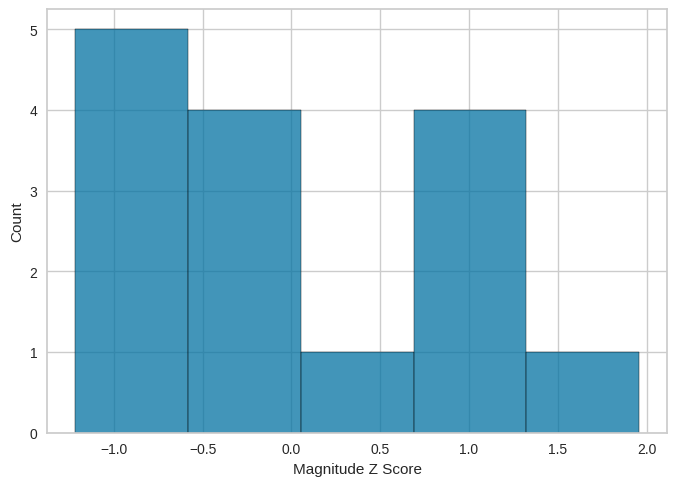

In [111]:
sns.histplot(df['Magnitude Z Score'])

<Axes: xlabel='Kedalaman Z Score', ylabel='Count'>

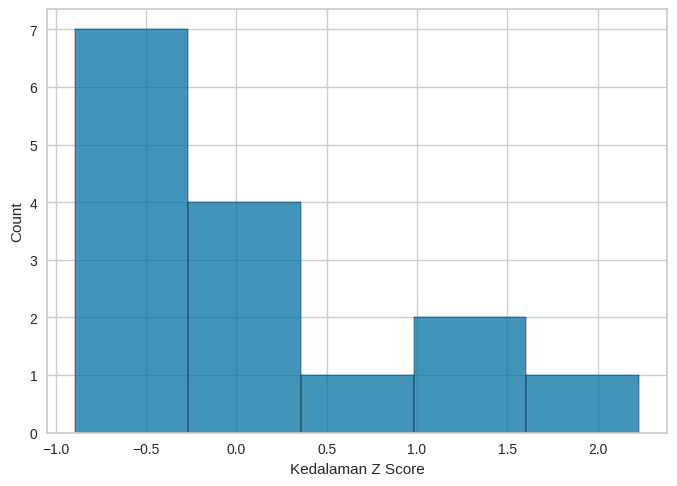

In [112]:
sns.histplot(df['Kedalaman Z Score'])

## Korelasi

In [113]:
df.iloc[:,:5].corr().iloc[:,-2:]

<ipython-input-113-5e7eadbd5c34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.iloc[:,:5].corr().iloc[:,-2:]


,Magnitude,Kedalaman
Lintang,0.560012,-0.206123
Bujur,-0.121779,-0.161786
Magnitude,1.000000,0.242612
Kedalaman,0.242612,1.000000


<ipython-input-114-32324831e099>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,:5].corr().iloc[-2:,:], annot=True, cmap=sns.cubehelix_palette(as_cmap=True))


<Axes: >

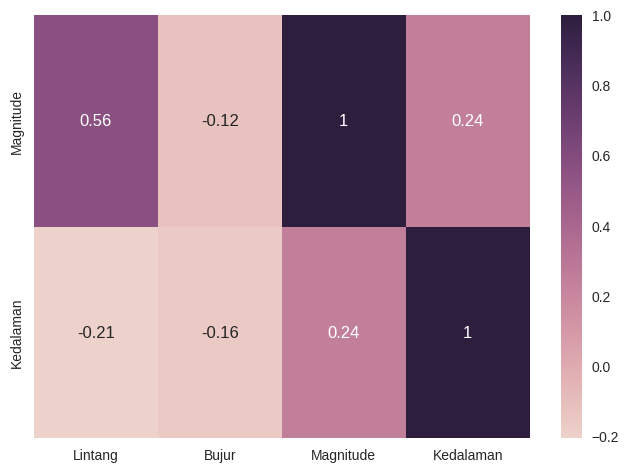

In [114]:
sns.heatmap(df.iloc[:,:5].corr().iloc[-2:,:], annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

## Cluster

<Axes: xlabel='Magnitude', ylabel='Kedalaman'>

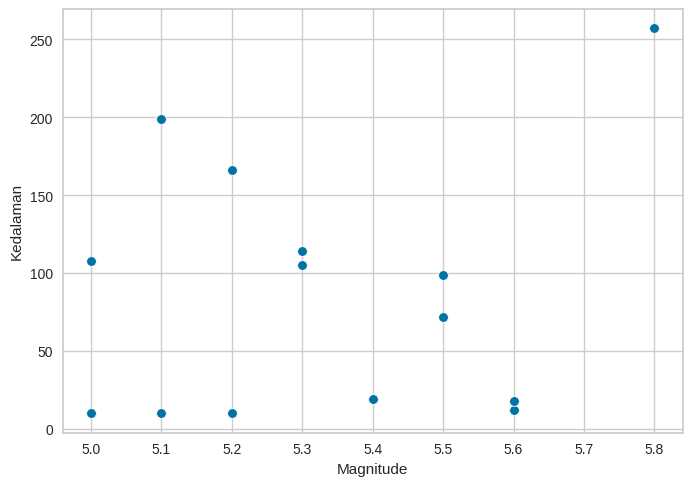

In [115]:
sns.scatterplot(data=df, x='Magnitude', y='Kedalaman')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

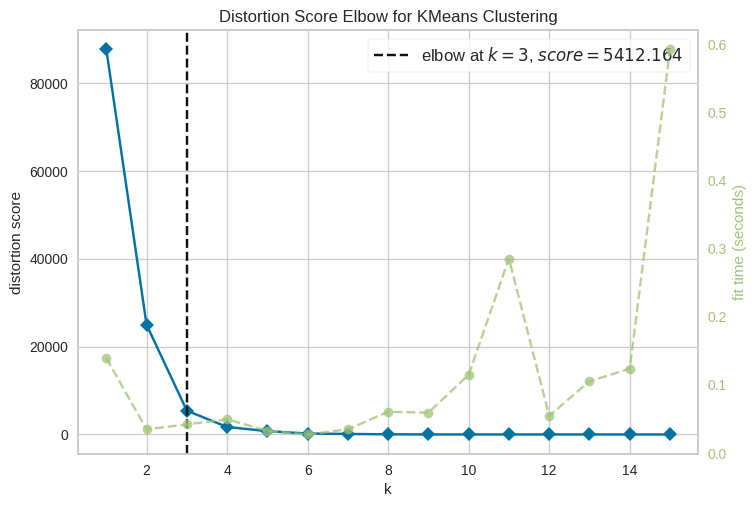

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
# Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,16))
visualizer.fit(df[['Magnitude', 'Kedalaman']])
visualizer.show()

<Axes: xlabel='Magnitude', ylabel='Kedalaman'>

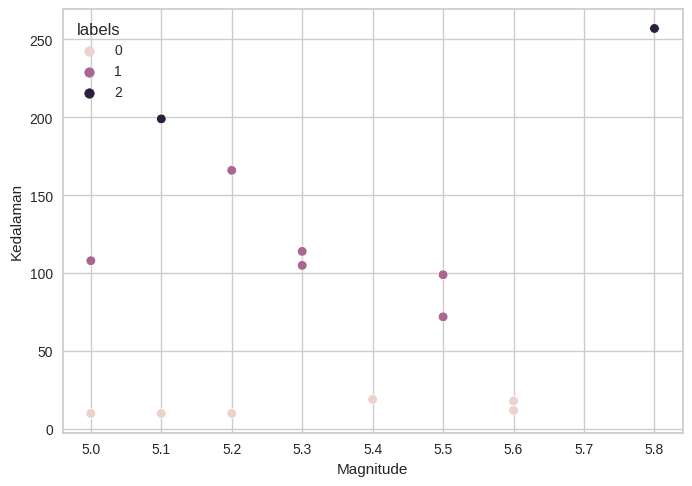

In [117]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df[['Magnitude', 'Kedalaman']])
df['labels'] = kmeans.labels_
sns.scatterplot(data=df, x='Magnitude', y='Kedalaman', hue=df['labels'])

## Regression

<Axes: xlabel='Magnitude', ylabel='Kedalaman'>

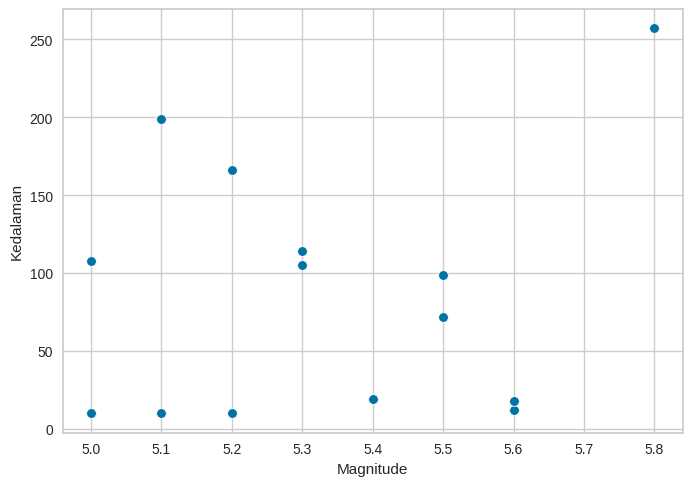

In [118]:
sns.scatterplot(data=df, x='Magnitude', y='Kedalaman')

In [119]:
X = df['Magnitude'].values.reshape(-1,1)
y = df['Kedalaman'].values

<Axes: xlabel='Magnitude', ylabel='Kedalaman'>

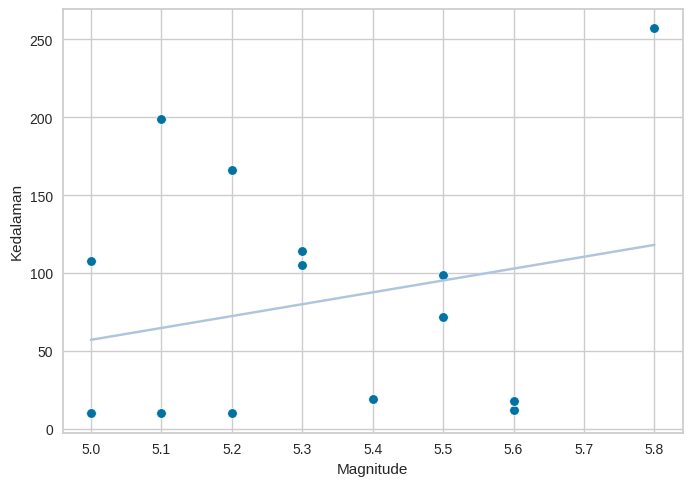

In [120]:
reg = LinearRegression().fit(X, y)
sns.scatterplot(data=df, x='Magnitude', y='Kedalaman')
sns.lineplot(x=df['Magnitude'], y=reg.predict(X), color='lightsteelblue')

In [121]:
reg.score(X, y)

0.05886082290934502

In [122]:
reg.predict([[5.7]])

array([110.55997001])

<Axes: xlabel='Magnitude', ylabel='Kedalaman'>

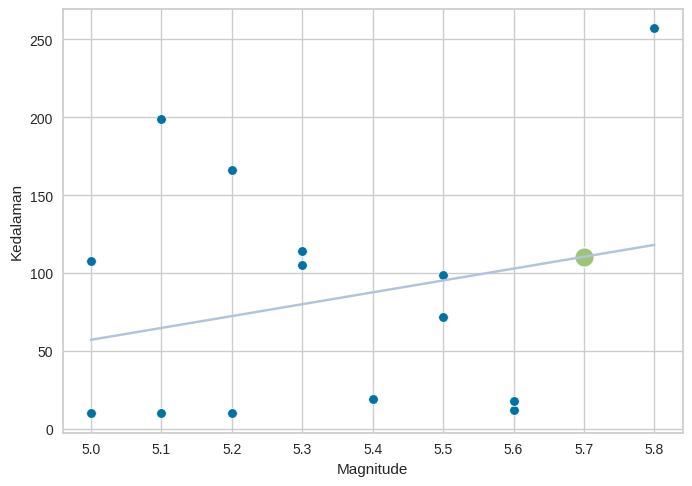

In [123]:
sns.scatterplot(data=df, x='Magnitude', y='Kedalaman')
sns.lineplot(x=df['Magnitude'], y=reg.predict(X), color='lightsteelblue')
sns.scatterplot(x=5.7, y=reg.predict([[5.7]]), s=200)